In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from PIL import Image
import io
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
base_dir='BatikDataset'
training_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir, 'validation')
test_dir=os.path.join(base_dir, 'test')

In [13]:
gen=ImageDataGenerator(rescale=1./255)
train_gen=gen.flow_from_directory( training_dir,
                                  target_size=(224, 224),
                                  class_mode='categorical',
                                  color_mode='rgb',
                                  shuffle=True,
                                  batch_size=64)

validgen=ImageDataGenerator(rescale=1./255)
valid_gen=validgen.flow_from_directory( validation_dir,
                                      target_size=(224, 224),
                                      class_mode='categorical',
                                      color_mode='rgb',
                                      shuffle=True,
                                      batch_size=64)

testgen=ImageDataGenerator(rescale=1./255)
test_gen=testgen.flow_from_directory( test_dir,
                                    target_size=(224, 224),
                                    class_mode='categorical',
                                    color_mode='rgb',
                                    shuffle=False,
                                    batch_size=64)

Found 838 images belonging to 5 classes.
Found 105 images belonging to 5 classes.
Found 105 images belonging to 5 classes.


In [14]:
inputs = Input(shape=(224, 224, 3))
base_model=tf.keras.applications.Xception(include_top=False,
                                          weights="imagenet",
                                          input_tensor=inputs)

In [15]:
base_model.trainable = False

In [16]:
x = tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1)(base_model.output)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

# Mendefinisikan model fungsional
model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add_12[0][0]    

 Total params: 21,452,781 (81.84 MB)

 Trainable params: 591,301 (2.26 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [19]:
history=model.fit(train_gen,
                  epochs=10,
                  validation_data=valid_gen)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5007 - loss: 1.6080 - val_accuracy: 0.8000 - val_loss: 0.5829
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.8076 - loss: 0.5168 - val_accuracy: 0.8762 - val_loss: 0.3848
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8867 - loss: 0.3347 - val_accuracy: 0.9048 - val_loss: 0.3726
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9276 - loss: 0.1918 - val_accuracy: 0.9048 - val_loss: 0.3153
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9582 - loss: 0.1347 - val_accuracy: 0.9048 - val_loss: 0.2863
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9682 - loss: 0.1027 - val_accuracy: 0.9429 - val_loss: 0.2733
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9803 - loss: 0.0717 - val_accuracy: 0.9429 - val_loss: 0.2494
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9809 - loss: 0.0501 - val_accuracy: 0.9238 - val_loss:

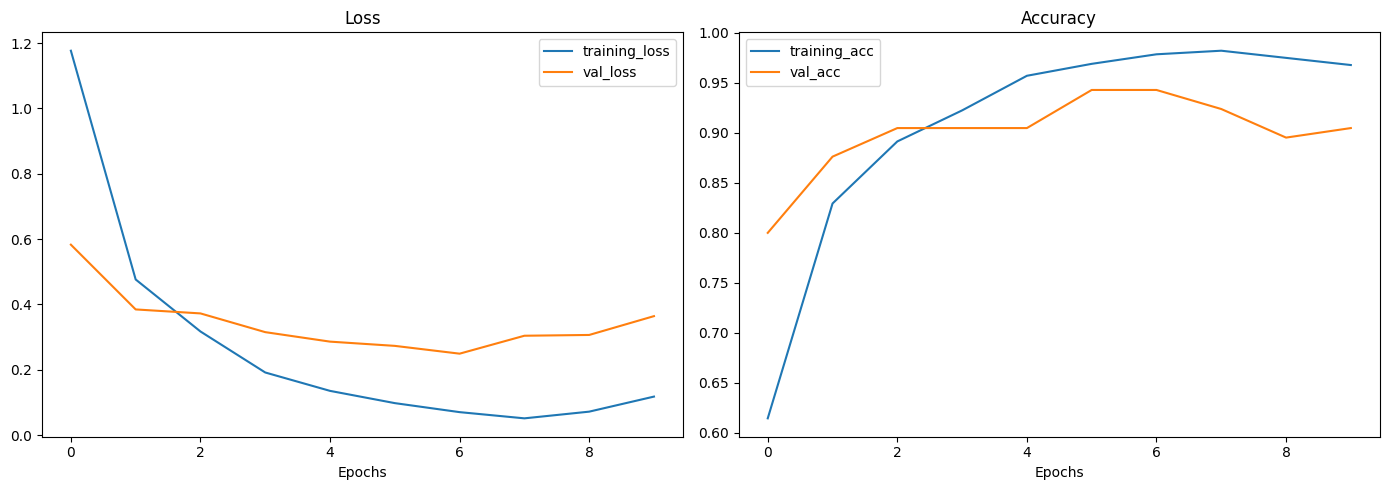

In [20]:
def plot_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(epochs, loss, label='training_loss')
    axs[0].plot(epochs, val_loss, label='val_loss')
    axs[0].set_title("Loss")
    axs[0].set_xlabel("Epochs")
    axs[0].legend()

    axs[1].plot(epochs, accuracy, label='training_acc')
    axs[1].plot(epochs, val_accuracy, label='val_acc')
    axs[1].set_title("Accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_curves(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


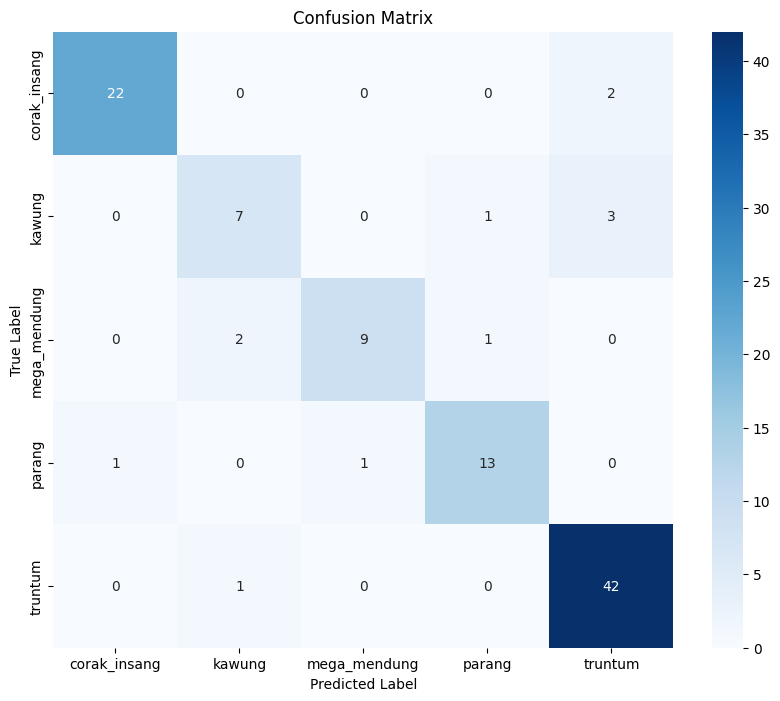

              precision    recall  f1-score   support

corak_insang       0.96      0.92      0.94        24
      kawung       0.70      0.64      0.67        11
mega_mendung       0.90      0.75      0.82        12
      parang       0.87      0.87      0.87        15
     truntum       0.89      0.98      0.93        43

    accuracy                           0.89       105
   macro avg       0.86      0.83      0.84       105
weighted avg       0.88      0.89      0.88       105



In [21]:
test_gen.reset()
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [22]:
model.save('model.keras')

In [23]:
model_path = 'model.keras'

model = tf.keras.models.load_model(model_path)
print("Model loaded successfully.")

Model loaded successfully.


In [24]:
class_labels = ['Batik Corak Insang',
                'Batik Kawung',
                'Batik Mega Mendung',
                'Batik Parang',
                'Batik Truntum']

In [25]:
def prepare_image(img):
    if img.mode != "RGB":
        img = img.convert("RGB")
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [26]:
def predict_image(model, img):
    img_array = prepare_image(img)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_index]
    return predicted_class, predictions

<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Faqih SA\AppData\Local\Temp\ipykernel_16704\586706094.py:23: SyntaxWarning: invalid escape sequence '\c'
  img_path = 'batik_images\corak_insang.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step


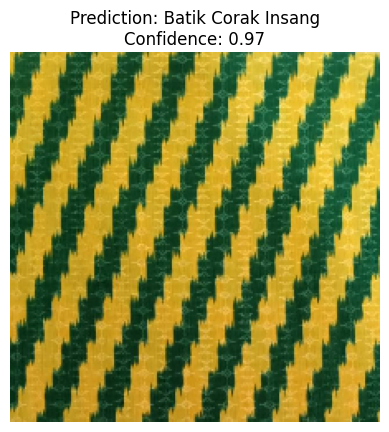

In [28]:
def predict_image(img_path):
    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence_score = predictions[0][predicted_class]

    # Get the label of the predicted class
    predicted_label = class_labels[predicted_class]

    # Plot the image
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence_score:.2f}")
    plt.axis('off')
    plt.show()

# Replace this with the path to the image you want to classify
img_path = 'batik_images\corak_insang.jpg'
predict_image(img_path)